# sklearn.svm: Support Vector Machines

* `svm.NuSVC([nu, kernel, degree, gamma, …])`: Nu-Support Vector Classification.
* `svm.SVC([C, kernel, degree, gamma, coef0, …])`: C-Support Vector Classification.
* `svm.LinearSVR([epsilon, tol, C, loss, …])`: Linear Support Vector Regression.

Other kernels were tested

In [1]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC, NuSVC, OneClassSVM, SVC, SVR, l1_min_c
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import gensim
import sys
sys.path.insert(0, '/home/mcunha/Documents/Classes/KW/G0B34a_knowledge_and_the_web/')
import data.ad_hominem.tokenize_df
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

#### Defining a function that will be used later...

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Just cleaned the data frame a bit

In [3]:
fallacies = pd.read_csv("../../data/ad_hominem/ad_hominems_cleaned_Murilo.csv")
fallacies = fallacies.drop(['Unnamed: 0'], axis=1)
fallacies = data.ad_hominem.tokenize_df.preprocess_df(fallacies)
fallacies['reddit_ad_hominem.body'].replace('', np.nan, inplace=True)
fallacies.dropna(subset=['reddit_ad_hominem.body'], inplace=True)
fallacies.reset_index()
train_data, test_data = train_test_split(fallacies, test_size=0.3, random_state=3)

fallacies.tail(n=10)

,reddit_ad_hominem.body,reddit_ad_hominem.ad_hominem
29277,we re gonna back him because we won know the d...,0
29278,gender,0
29279,which was alienating and confusing it makes yo...,0
29280,and the such my relationship was my baptize by...,0
29281,because that was label that other can understand,0
29282,it is more effective to report it than downvot...,0
29283,which was alienating and confusing it makes yo...,0
29284,because that was quot label that other,0
29285,times more iron fragments than asbestos,0
29286,ve never heard of supreme court rulings allowi...,0


#### I used the TdidfVectorizer from /models/01_tfidf/tfidf.ipynb

In [4]:
v = TfidfVectorizer(ngram_range = (1, 1), max_features=3000)
v.fit(train_data['reddit_ad_hominem.body'].values.astype('U'))

x_train = v.transform(train_data['reddit_ad_hominem.body'].values.astype('U'))
y_train = list(train_data["reddit_ad_hominem.ad_hominem"])

x_test = v.transform(test_data['reddit_ad_hominem.body'].values.astype('U'))
y_test = list(test_data["reddit_ad_hominem.ad_hominem"])

## NuSVC
The kernels to be used are:
* `linear`
* `poly`
* `sigmoid`
* `rbf`

The kernel `rbf` was used in the [SVMs.ipynb](./SVMs.ipynb). Here for comparison.

Fitting NuSVC model...
Done!
Confusion matrix, without normalization
[[7132  947]
 [ 408  283]]
Normalized confusion matrix
[[0.88 0.12]
 [0.59 0.41]]
CPU times: user 3min 40s, sys: 343 ms, total: 3min 40s
Wall time: 3min 40s


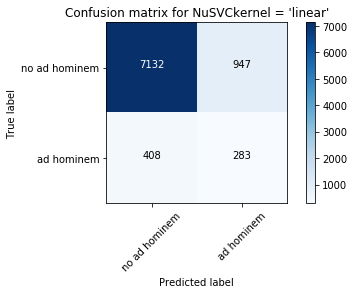

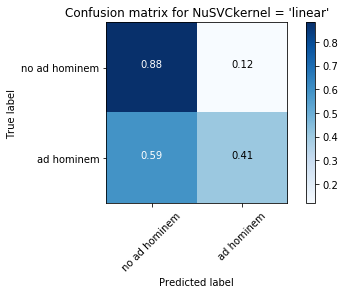

In [5]:
%%time

print("Fitting NuSVC model...")
nuModel = NuSVC(nu=0.05, kernel='linear').fit(x_train, y_train)
print("Done!")

predicted = nuModel.predict(x_test)

# Compute confusion matrix
nuModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + NuSVC.__name__ +  " kernel = 'linear'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

Fitting NuSVC model...
Done!
Confusion matrix, without normalization
[[5027 3052]
 [ 126  565]]
Normalized confusion matrix
[[0.62 0.38]
 [0.18 0.82]]
CPU times: user 15.1 s, sys: 284 ms, total: 15.4 s
Wall time: 15.1 s


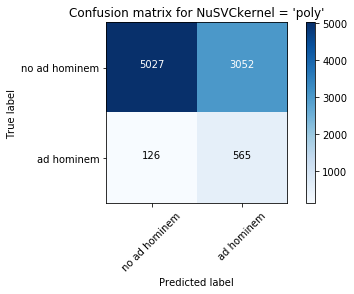

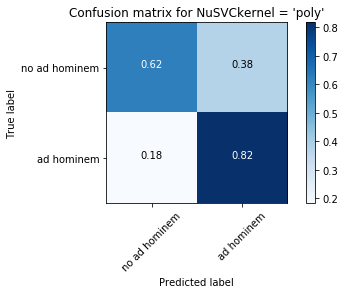

In [6]:
%%time

print("Fitting NuSVC model...")
nuModel = NuSVC(nu=0.05, kernel='poly').fit(x_train, y_train)
print("Done!")

predicted = nuModel.predict(x_test)

# Compute confusion matrix
nuModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + NuSVC.__name__ + " kernel = 'poly'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

Fitting NuSVC model...
Done!
Confusion matrix, without normalization
[[2801 5278]
 [  43  648]]
Normalized confusion matrix
[[0.35 0.65]
 [0.06 0.94]]
CPU times: user 17.5 s, sys: 288 ms, total: 17.8 s
Wall time: 17.5 s


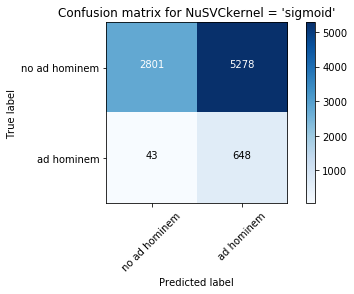

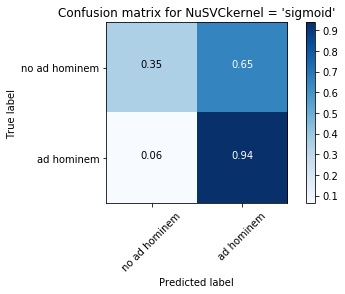

In [7]:
%%time

print("Fitting NuSVC model...")
nuModel = NuSVC(nu=0.05, kernel='sigmoid').fit(x_train, y_train)
print("Done!")

predicted = nuModel.predict(x_test)

# Compute confusion matrix
nuModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + NuSVC.__name__ + " kernel = 'sigmoid'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

Fitting NuSVC model...
Done!
Confusion matrix, without normalization
[[6279 1800]
 [ 305  386]]
Normalized confusion matrix
[[0.78 0.22]
 [0.44 0.56]]
CPU times: user 19.2 s, sys: 270 ms, total: 19.5 s
Wall time: 19.2 s


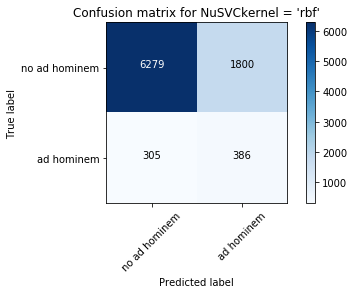

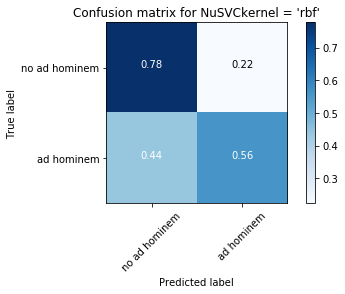

In [8]:
%%time

print("Fitting NuSVC model...")
nuModel = NuSVC(nu=0.05, kernel='rbf').fit(x_train, y_train)
print("Done!")

predicted = nuModel.predict(x_test)

# Compute confusion matrix
nuModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + NuSVC.__name__ + " kernel = 'rbf'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

## SVC
Theoretically equivalent to other methods (LinearSVC and NuSVC), but uses different implementations.
* `LinearSVC` is equivalent to `SVC(kernel = 'linear')`
* From documentation: *`SVC` and `NuSVC` are similar methods, but accept slightly different sets of parameters and have different mathematical formulations (see section [Mathematical formulation](https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation))

The kernels to be used are:
* `poly`
* `sigmoid`
* `precomputed`
* `rbf`
* `linear`

The kernel `rbf` was used in the [SVMs.ipynb](./SVMs.ipynb). Here for comparison.

Fitting SVC model...
Done!
Confusion matrix, without normalization
[[6279 1800]
 [ 305  386]]
Normalized confusion matrix
[[0.78 0.22]
 [0.44 0.56]]
CPU times: user 54.9 s, sys: 288 ms, total: 55.2 s
Wall time: 54.8 s


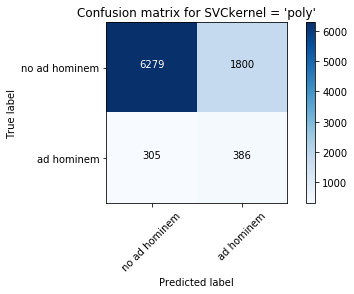

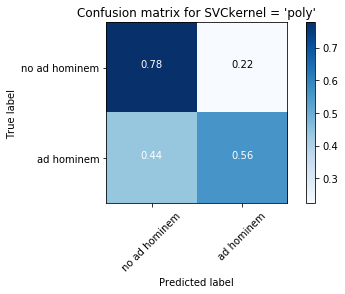

In [9]:
%%time

print("Fitting SVC model...")
svcModel = SVC(kernel='poly').fit(x_train, y_train)
print("Done!")

predicted = svcModel.predict(x_test)

# Compute confusion matrix
svcModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + SVC.__name__ + " kernel = 'poly'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

Fitting SVC model...
Done!
Confusion matrix, without normalization
[[6279 1800]
 [ 305  386]]
Normalized confusion matrix
[[0.78 0.22]
 [0.44 0.56]]
CPU times: user 57.5 s, sys: 252 ms, total: 57.7 s
Wall time: 57.4 s


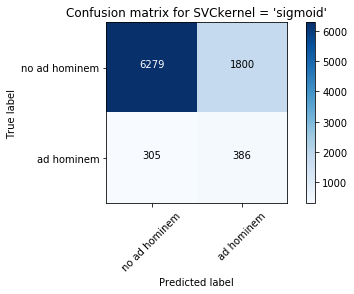

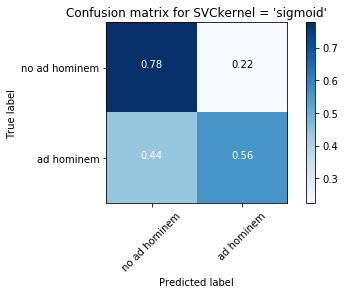

In [10]:
%%time

print("Fitting SVC model...")
svcModel = SVC(kernel='sigmoid').fit(x_train, y_train)
print("Done!")

predicted = svcModel.predict(x_test)

# Compute confusion matrix
svcModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + SVC.__name__ + " kernel = 'sigmoid'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

Fitting SVC model...
Done!
Confusion matrix, without normalization
[[6279 1800]
 [ 305  386]]
Normalized confusion matrix
[[0.78 0.22]
 [0.44 0.56]]
CPU times: user 58.9 s, sys: 152 ms, total: 59.1 s
Wall time: 58.9 s


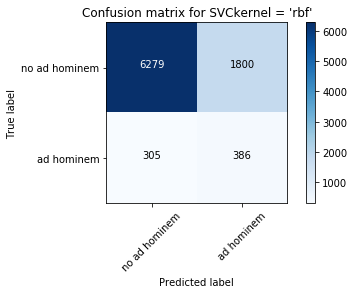

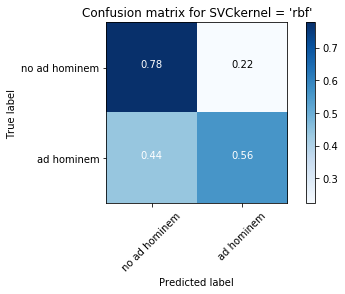

In [12]:
%%time

print("Fitting SVC model...")
svcModel = SVC(kernel='rbf').fit(x_train, y_train)
print("Done!")

predicted = svcModel.predict(x_test)

# Compute confusion matrix
svcModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + SVC.__name__ + " kernel = 'rbf'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

Fitting SVC model...
Done!
Confusion matrix, without normalization
[[6279 1800]
 [ 305  386]]
Normalized confusion matrix
[[0.78 0.22]
 [0.44 0.56]]
CPU times: user 1min 21s, sys: 244 ms, total: 1min 21s
Wall time: 1min 20s


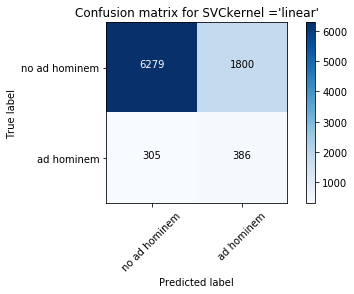

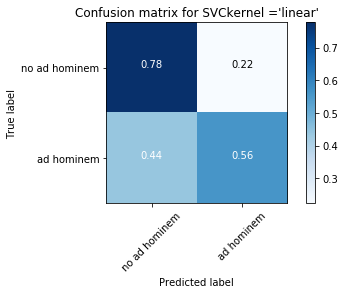

In [13]:
%%time

print("Fitting SVC model...")
svcModel = SVC(kernel='linear').fit(x_train, y_train)
print("Done!")

predicted = svcModel.predict(x_test)

# Compute confusion matrix
svcModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + SVC.__name__ + " kernel ='linear'"

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

## LinearSVC
As seen before, it is equivalent to `SVC(kernel='linear'`, with implementation differences. Here for comparison

Fitting linear model...
Done!
Confusion matrix, without normalization
[[7936  143]
 [ 481  210]]
Normalized confusion matrix
[[0.98 0.02]
 [0.7  0.3 ]]
CPU times: user 598 ms, sys: 256 ms, total: 854 ms
Wall time: 520 ms


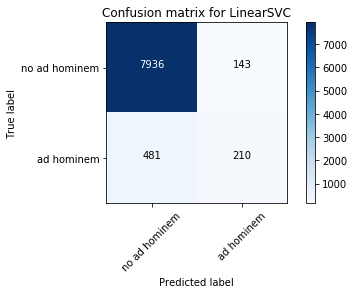

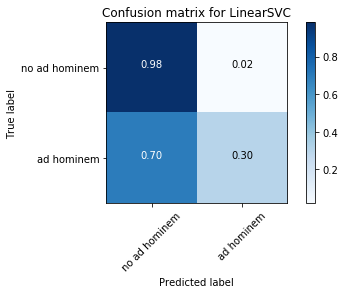

In [14]:
%%time

print("Fitting linear model...")
linearModel = LinearSVC().fit(x_train, y_train)
print("Done!")

predicted = linearModel.predict(x_test)

# Compute confusion matrix
linearModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + LinearSVC.__name__

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(linearModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(linearModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)